In [1]:
import numpy as np
import tsaug
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Timeseries data augmentation
In order to increase generalization / robustness of the models we will train, we need to figure out a way to do data augmentation on time series. We have found different ways to do so, some of which being already implemented in the `tsaug` open-source package.

This notebook aims to experiment with both `tsaug` and the custom class we are implementing to create augmented data pipelines.

In [2]:
X = np.load("../res/x_train.npy")
Y = np.load("../res/y_train.npy")

In [3]:
avg_x = [np.mean(X[Y == k], axis=0) for k in range(12)]

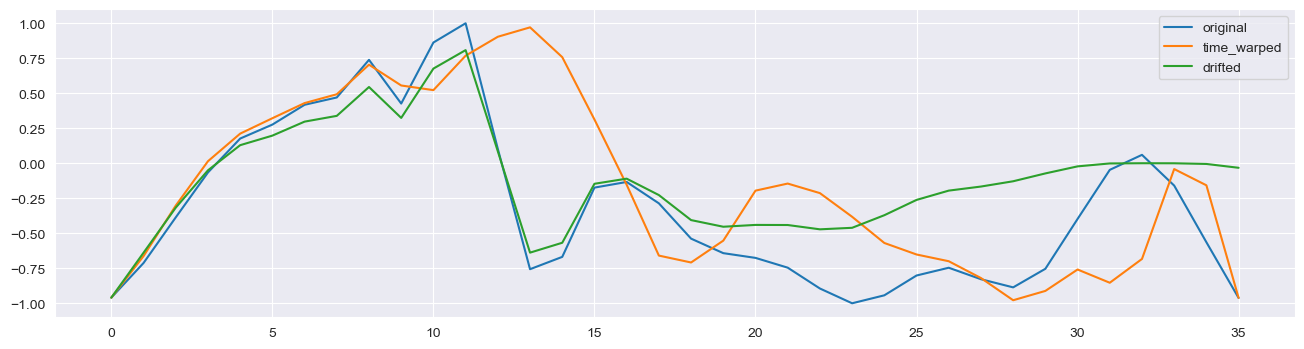

In [4]:
x = avg_x[0] # Class 1 example

x = MinMaxScaler((-1, 1)).fit_transform(x)

time_warped_x = tsaug.TimeWarp(
    n_speed_change=3,
    max_speed_ratio=3.0,
    repeats=1,
).augment(x[:, 0])

drifted_x = tsaug.Drift(
    max_drift=1,
    n_drift_points=4,
    kind="multiplicative",
    normalize=False,
).augment(x[:, 0])

_, ax = plt.subplots(figsize=(16, 4))

ax.plot(x[:,0], label="original")
ax.plot(time_warped_x, label="time_warped")
ax.plot(drifted_x, label="drifted")
plt.legend()
plt.show()

In [5]:
drifted_x[:0:-1]

array([-3.22342942e-02, -4.88520770e-03, -0.00000000e+00,  3.59575117e-04,
       -1.17436138e-03, -2.20991416e-02, -7.24126219e-02, -1.28511184e-01,
       -1.66222848e-01, -1.95292303e-01, -2.61730797e-01, -3.71016125e-01,
       -4.60874005e-01, -4.71752673e-01, -4.40966538e-01, -4.40271661e-01,
       -4.53284524e-01, -4.05819433e-01, -2.27076875e-01, -1.09880812e-01,
       -1.46435319e-01, -5.67749857e-01, -6.38301569e-01,  8.53408363e-02,
        8.08296802e-01,  6.76356483e-01,  3.23985110e-01,  5.44776588e-01,
        3.38674407e-01,  2.97484458e-01,  1.97545592e-01,  1.29265088e-01,
       -5.03115569e-02, -3.16865135e-01, -6.38928484e-01])

In [6]:
from balanced_data_pipe import SequenceDataGenerator

In [7]:
seq_gen = SequenceDataGenerator(
    X,
    Y,
    42,
    0.2,
    32,
    output_window=36,
    subsequence_stride=12,
    subsequence_padding="wrap",
    gaussian_noise_factor=0.1,
    masking_percentage=0.1,
    amp_scaling_range=0.3,
    amp_warping_params=[4, 0.6],
    n_time_warp=4,
    max_time_warp=3.0,
    max_drift=2,
    n_drift_points=4,
    drift_kind="additive"
)

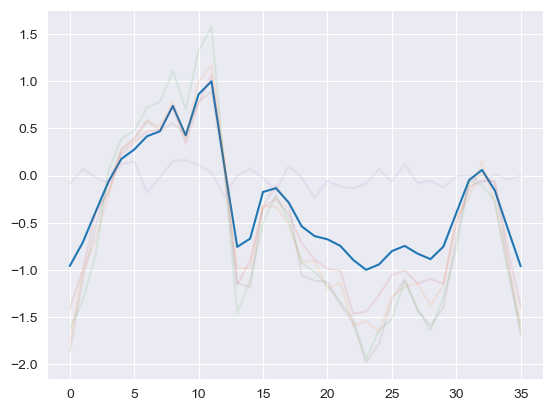

In [8]:
plt.plot(x[:, 0])
for i in range(5):
    plt.plot(seq_gen.augment(x)[:,0], alpha = 0.1)
plt.show()

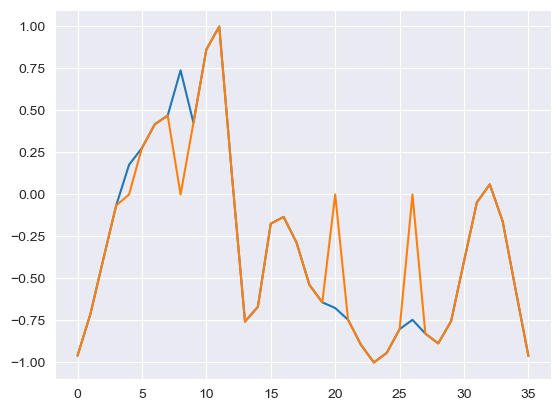

In [9]:
plt.plot(x[:,0])
plt.plot(seq_gen._dropout(x)[:,0])

In [10]:
train_ds = seq_gen.get_augmented_sequence_dataset()

NotImplementedError: in user code:

    File "C:\Users\Achille\OneDrive\ERASMUS\ANNDL\multivariate-timeseries-classification\src\balanced_data_pipe.py", line 287, in None  *
        lambda x, y: (self.augment(x), y)
    File "C:\Users\Achille\OneDrive\ERASMUS\ANNDL\multivariate-timeseries-classification\src\balanced_data_pipe.py", line 187, in augment  *
        xx = self._magnitude_warp(x)
    File "C:\Users\Achille\OneDrive\ERASMUS\ANNDL\multivariate-timeseries-classification\src\balanced_data_pipe.py", line 158, in _magnitude_warp  *
        return tf.multiply(x, cs(x))
    File "C:\Users\Achille\.conda\envs\AN2DL\lib\site-packages\scipy\interpolate\interpolate.py", line 927, in __call__  *
        x = np.asarray(x)

    NotImplementedError: Cannot convert a symbolic tf.Tensor (args_0:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.


In [ ]:
train_ds